<a href="https://colab.research.google.com/github/alperbayram/Turkish-NLP-examples/blob/main/Twitter_Sentiment_Analysis_by_Username.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install transformers

In [61]:
!pip install nest-asyncio

In [1]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

fatal: destination path 'twint' already exists and is not an empty directory.
/content/twint
Processing /content/twint
  Created wheel for twint: filename=twint-2.1.21-cp37-none-any.whl size=38863 sha256=45243a17a4156acb293ce921ebeab29fb796b6f346e338129c63deabddec6512
  Stored in directory: /tmp/pip-ephem-wheel-cache-h9f8zqdv/wheels/c9/bb/bd/2b559954ecc4f4905266df71e9f2e08268750df0fa1ec1a4d2
Successfully built twint
  Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21


In [2]:
import os
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import csv
from openpyxl import Workbook
from datetime import datetime
import seaborn as sns
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from pandas import Series, DataFrame
from datetime import datetime

In [4]:
now = datetime.now()
date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)

date and time: 05/31/2021, 23:54:18


In [5]:
import nest_asyncio
nest_asyncio.apply()# used once to enable concurrent actions within a Jupyter notebook.

# [**Twint**](https://github.com/twintproject/twint)
Python'da yazılmış, Twitter'ın API'sini kullanmayan gelişmiş bir Twitter kazıma ve OSINT aracı, çoğu API sınırlamasından kaçarken bir kullanıcının takipçilerini, takiplerini, Tweetlerini ve daha fazlasını kazımanıza olanak tanır.

In [8]:
import twint
   
print ("tweet alınıyor...")
c = twint.Config()
# kullanıcı adı giriniz
#c.Username = input('Username: ') 
c.Username = 'alperbayrmm'
c.Custom["tweet"] = ["date", "username","hour"]
c.Pandas = True
twint.run.Search(c)
Tweets_df = twint.storage.panda.Tweets_df
print('başarılı!')

tweet alınıyor...
1399462097671577601 2021-05-31 20:25:39 +0000 <alperbayrmm> O dur o anladın sen onu #SendenNefretEdiyoruz
1399104588368785409 2021-05-30 20:45:02 +0000 <alperbayrmm> Hayırlı uğurlu olsun  https://t.co/gX40hciCHk
1399100390138953730 2021-05-30 20:28:21 +0000 <alperbayrmm> Basket faul ya mükemmelsiniz
1399091023293431811 2021-05-30 19:51:08 +0000 <alperbayrmm> Larkin yeterki istesin evden atar basketi
1399085237469077506 2021-05-30 19:28:09 +0000 <alperbayrmm> 1.0 da faul aldı Anadolu Efes mükemmel
1398585579516928000 2021-05-29 10:22:41 +0000 <alperbayrmm> ben hayatın sillesini yemiş ve üzerine depiklerle yere düştükten sonra hayat tarafından yerde tekmelenmiş bir insanım
1398584458694074377 2021-05-29 10:18:14 +0000 <alperbayrmm> hayatı şikayet ediyorum
1398249299381731334 2021-05-28 12:06:25 +0000 <alperbayrmm> Cv
1397672943837237254 2021-05-26 21:56:11 +0000 <alperbayrmm> penaltılar bitmeyecek sandım #UELfinal
1396958781729386497 2021-05-24 22:38:22 +0000 <alperbayr

In [10]:
    df_Tweetler=Tweets_df.filter(items=['tweet'])
    df_Tweets = pd.DataFrame(df_Tweetler)

In [11]:
 df_Tweets.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   48 non-null     object
dtypes: object(1)
memory usage: 512.0+ bytes


# **Tweetlerin temizlenmesi **

In [12]:

#noktalama işaretleri
df_Tweets["tweet"] = df_Tweets["tweet"].str.replace('[^\w\s]','')
# #sayılar
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('\d','')
# df_Tweetler["Tweets"]= df_Tweetler["Tweets"].str.replace('(?:\@|http?\://|https?\://|www\S+)','')
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('@[A-Za-z0-9]+','')
df_Tweets["tweet"] =df_Tweets["tweet"].str.replace('http\S+','')

# **DUYGU ANALİZİ KISMI BERT MODELLERİNİN YÜKLENMESİ**

In [13]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification

In [14]:
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

In [15]:
analysis=pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [25]:
analysis("allah belanı versin. seni sevmiyorum.")

[{'label': 'negative', 'score': 0.9965597987174988}]

In [26]:
code_to_label={
 'negative': 'negatif',
 'positive': 'pozitif',
    'notr': 'notr'
    
}

In [27]:
orders = df_Tweets.value_counts().count()
print('Tweet sayısı :',orders)
#len(df_Tweetler.Tweets)

Tweet sayısı : 48


In [28]:
Tweet = list(df_Tweets['tweet'])
Tweet

['O dur o anladın sen onu SendenNefretEdiyoruz',
 'Hayırlı uğurlu olsun  ',
 'Basket faul ya mükemmelsiniz',
 'Larkin yeterki istesin evden atar basketi',
 ' da faul aldı Anadolu Efes mükemmel',
 'ben hayatın sillesini yemiş ve üzerine depiklerle yere düştükten sonra hayat tarafından yerde tekmelenmiş bir insanım',
 'hayatı şikayet ediyorum',
 'Cv',
 'penaltılar bitmeyecek sandım UELfinal',
 'bu gecenin sorumlusu ben miyim',
 'Abi hiç gülünecek bir durum yok tüm Türkiye izliyor gülebiliyor',
 'Biz ne izliyoz abi ooo',
 'Soru soramayacaklarsa bu gazeteciler niye çıktı',
 'adam konuşuyor ama konuşmanın arkasında durmuyor',
 'açtık habertürkü de bu adam ne anlatıyor böyle yine kendilerini övme falan iş dönüp dolaşıp işin başı israil demeseler bari',
 'emoji dnm ',
 'Konuyla ne alakası var',
 'Bi mevzuya da bakmayın kardeşim gidin başka işle uğraşın lan',
 'Ayrıca bu sektörde türeyen Hintlilerin amk karşılaşırsam hiç acımam',
 'Its programmed jajajjaj link  ',
 'karanfilsin tarçınsın neden

# **Tweeetlerin tek tek gezilmesi ve sonuçların ve scorun boş diziye aktarılması**

In [29]:
d= list()
k= list()
for i in range(orders):
                    c= analysis(Tweet[i])
                    #a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    h =  c[0]['score']
                    #d =np.append(a)
                    d.append(a)
                    k.append(h)

# **Sonuçların Tabloya eklenmesi**

In [30]:
d
df_Tweetler["Tweets_duygu"]= pd.DataFrame(d)
#df_Tweetler["Tweets_duygu"]=df_Tweetler["Tweets"].map(lambda x: "".join(d))


In [31]:
df_Tweetler

,tweet,Tweets_duygu
0,O dur o anladın sen onu SendenNefretEdiyoruz,pozitif
1,Hayırlı uğurlu olsun,pozitif
2,Basket faul ya mükemmelsiniz,pozitif
3,Larkin yeterki istesin evden atar basketi,pozitif
4,da faul aldı Anadolu Efes mükemmel,pozitif
5,ben hayatın sillesini yemiş ve üzerine depikle...,negatif
6,hayatı şikayet ediyorum,negatif
7,Cv,pozitif
8,penaltılar bitmeyecek sandım UELfinal,pozitif
9,bu gecenin sorumlusu ben miyim,negatif


# **Sonuç**

In [32]:
df_Tweetler['Tweets_duygu'].value_counts()

pozitif    26
negatif    22
Name: Tweets_duygu, dtype: int64

# **Sonuçların Görselleştirilmesi**

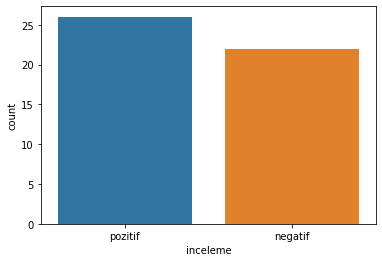

In [33]:
sns.countplot(df_Tweetler.Tweets_duygu)
plt.xlabel('inceleme');

# **Pasta histogram ile gösterilmesi**

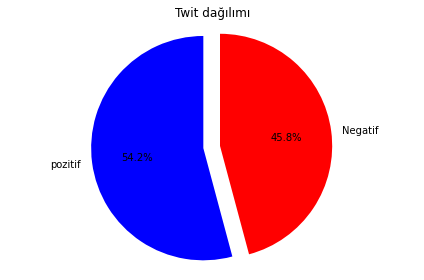

In [52]:

pozitif = (df_Tweetler['Tweets_duygu'] == 'pozitif').sum()
negatif = (df_Tweetler['Tweets_duygu'] == 'negatif').sum()

# put them into a list called proportions
proportions = [pozitif, negatif]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['pozitif', 'Negatif'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Twit dağılımı")

# View the plot
plt.tight_layout()
plt.show()

# **Histogram olarak gösterilmesi**

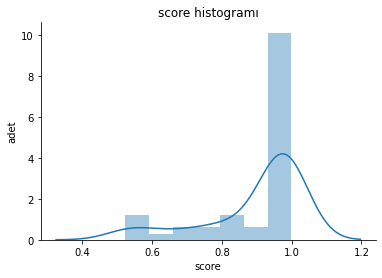

In [34]:

# create histogram
ttbill = sns.distplot(k);

# set lables and titles
ttbill.set(xlabel = 'score', ylabel = 'adet', title = "score histogramı")

# take out the right and upper borders
sns.despine()

[***Evet arkdaşlar sona geldiniz bi starınız alırım... :) İşinize yaradıysa ne mutlu bana..kolay gelsin***](https://github.com/alperbayram/Turkish-NLP-examples)